In [6]:
import pandas as pd
import numpy as np
import re
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.options.mode.chained_assignment = None

In [7]:
from os import listdir
from os.path import isfile, join
path = '../scripts_scrapping/data_scrapping_csv'
liste_csv = [f for f in listdir(path) if isfile(join(path, f))]

In [8]:
df_total = pd.DataFrame()
for filename in liste_csv:
    
    path = "../scripts_scrapping/data_scrapping_csv/"+filename
    df = pd.read_csv(path)
    df['nom_journal'] = filename[:-4]     
    df_total = df_total.append(df, ignore_index=True)
    
df_total = df_total.drop(['theme'], axis=1)
df_total.date = pd.to_datetime(df_total['date'])

In [9]:
df_total = df_total[df_total['date']>= pd.to_datetime('2016', format='%Y')]

In [10]:
df_total

,date,nom_journal,titre
0,2020-12-30,charlie_hebdo,Mairie de Marseille : la cuisine électorale es...
1,2020-12-30,charlie_hebdo,L'État bien profond
2,2020-12-28,charlie_hebdo,Vive la transparence politique
3,2020-12-28,charlie_hebdo,Conseil des imams : le recteur de la Grande Mo...
4,2020-12-23,charlie_hebdo,La charité au programme de La République en ma...
...,...,...,...
1305558,2020-12-31,science_avenir,Les “mégaphones” artisanaux des petits grillons
1305559,2020-12-31,science_avenir,"Covid-19: ""envolée"" des tests la semaine de Noël"
1305560,2020-12-31,science_avenir,"Séismes à Strasbourg : deux ""écarts"" commis à ..."
1305561,2020-12-31,science_avenir,Revue de presse Allemagne : double inhumation ...


In [45]:
#
def affiche_occ_list(liste_de_liste, freq = '1M',first=True,année='2016',lv=[],lab=''):
    global df_total
    #dfg = df_total[df_total['date']>= pd.to_datetime(année, format='%Y')].copy()
    dfg = df_total[df_total['date']>= pd.Timestamp(année)].copy()
    l_d = []
    for liste in liste_de_liste:
        l_occ = []
        for titre in dfg['titre']:
            y = False
            #tl = titre.lower().split()
            tl = str(titre).lower()
            for mot in liste:
                pattern = mot.lower()+"[\w'>:={}-]*"
                if re.search(pattern, tl):
                #if mot.lower() in tl:
                    y = True
            if y:
                l_occ.append(1)
            else:
                l_occ.append(0)

        if first:
            name_aff = liste[0]
        else:
            name_aff = str(liste)
            
        dfg[name_aff] = l_occ
        l_d.append(name_aff)
        
    #GB=df.groupby([(df.index.year),(df.index.month)]).sum()
    #GB = (dfg.groupby( pd.Grouper(key='date', freq=freq)).sum())
    #df_total[df_total['date']>= pd.to_datetime('2016', format='%Y')]
    GB = dfg.groupby( pd.Grouper(key='date', freq=freq)).sum()
    
    GB.plot(figsize=(20,8))
    #ligne verticale pour date
    for d in lv:    
        plt.axvline(pd.Timestamp(d),color='r')
        if lab:
            plt.text(pd.Timestamp(d),10,lab,rotation=45)
        else:
            plt.text(pd.Timestamp(d),10,d,rotation=90)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()
    #df_total.drop(columns= l_d, inplace=True)

In [73]:
#
def affiche_occ_2(m1,m2, freq = '1M',année='2016',lv=[],lab=''):
    global df_total
    #dfg = df_total[df_total['date']>= pd.to_datetime(année, format='%Y')].copy()
    dfg = df_total[df_total['date']>= pd.Timestamp(année)].copy()
    l_d = []
    
    l_occ = []
    for titre in dfg['titre']:
        y = False
        tl = str(titre).lower()
        m1 = m1.lower()
        m2 = m2.lower()
        #pattern = mot.lower()+"[\w'>:={}-]*"
        pattern = m1+".*"+m2+"|"+m2+".*"+m1
        if re.search(pattern, tl):
            y = True
        if y:
            l_occ.append(1)
        else:
            l_occ.append(0)

    name_aff = str(m1)+" "+str(m2)

    dfg[name_aff] = l_occ
    l_d.append(name_aff)
        
    #GB=df.groupby([(df.index.year),(df.index.month)]).sum()
    #GB = (dfg.groupby( pd.Grouper(key='date', freq=freq)).sum())
    #df_total[df_total['date']>= pd.to_datetime('2016', format='%Y')]
    GB = dfg.groupby( pd.Grouper(key='date', freq=freq)).sum()
    
    GB.plot(figsize=(20,8), xticks = 14 , )
    #ligne verticale pour date
    for d in lv:    
        plt.axvline(pd.Timestamp(d),color='r')
        if lab:
            plt.text(pd.Timestamp(d),10,lab,rotation=45)
        else:
            plt.text(pd.Timestamp(d),10,d,rotation=90)
        
    plt.rcParams['xtick.labelsize']=14
    plt.rcParams['ytick.labelsize']=14
    plt.tick_params(axis='x', labelsize=14)
    plt.show()
    #df_total.drop(columns= l_d, inplace=True)

In [70]:
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14

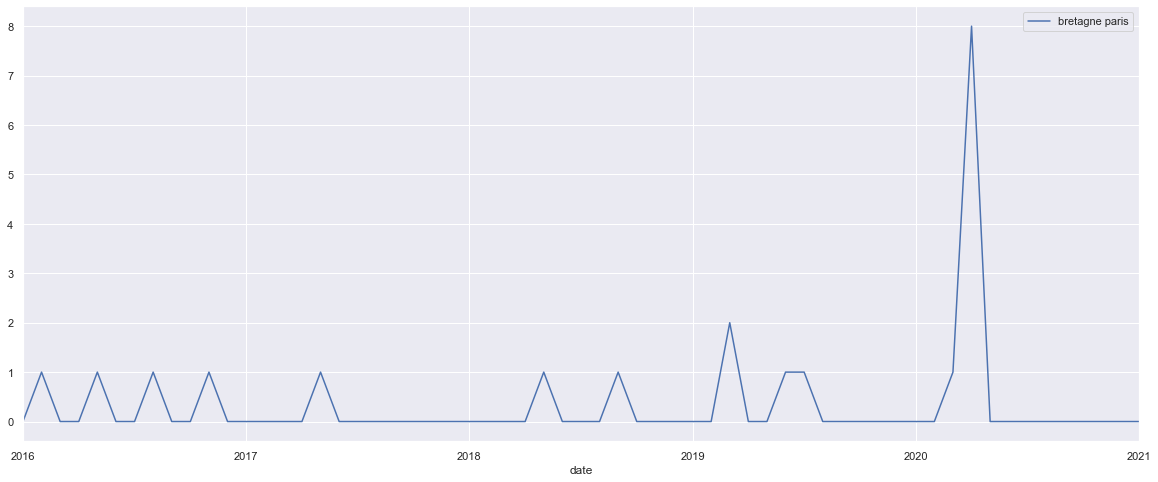

In [46]:
affiche_occ_2('Bretagne', 'paris', freq = '1M',année='2016',lv=[],lab='')

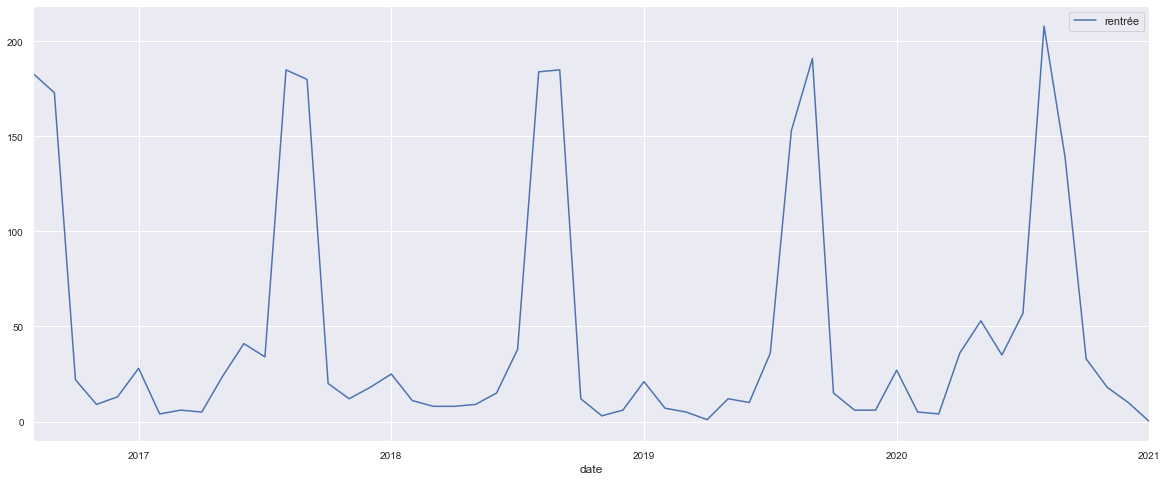

In [61]:
affiche_occ_list([['rentrée']], freq = '1M',first=True,année='2016-08')

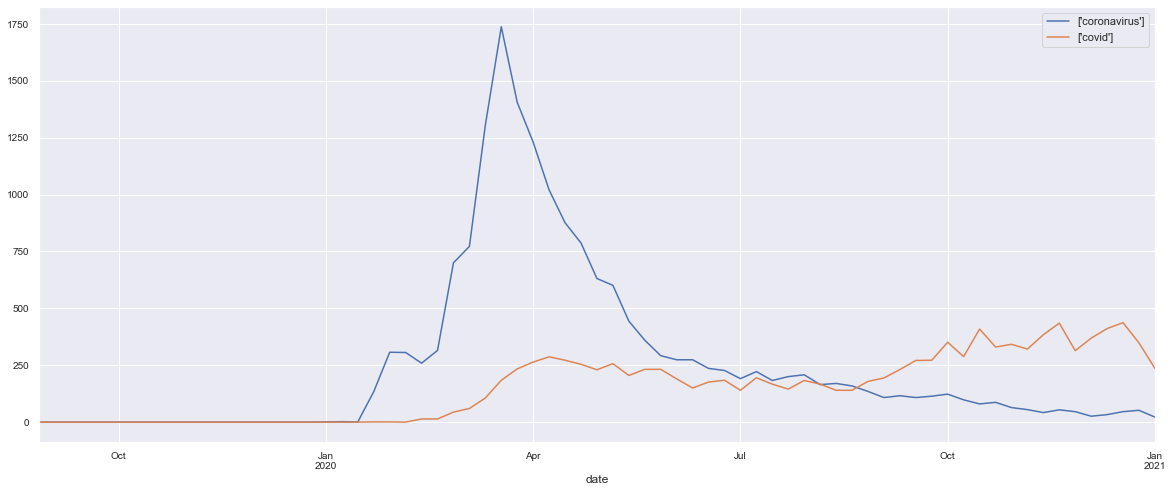

In [74]:
affiche_occ_list([[ 'coronavirus' ],[ 'covid' ]], freq = '1W',first=False,année='2019-09')

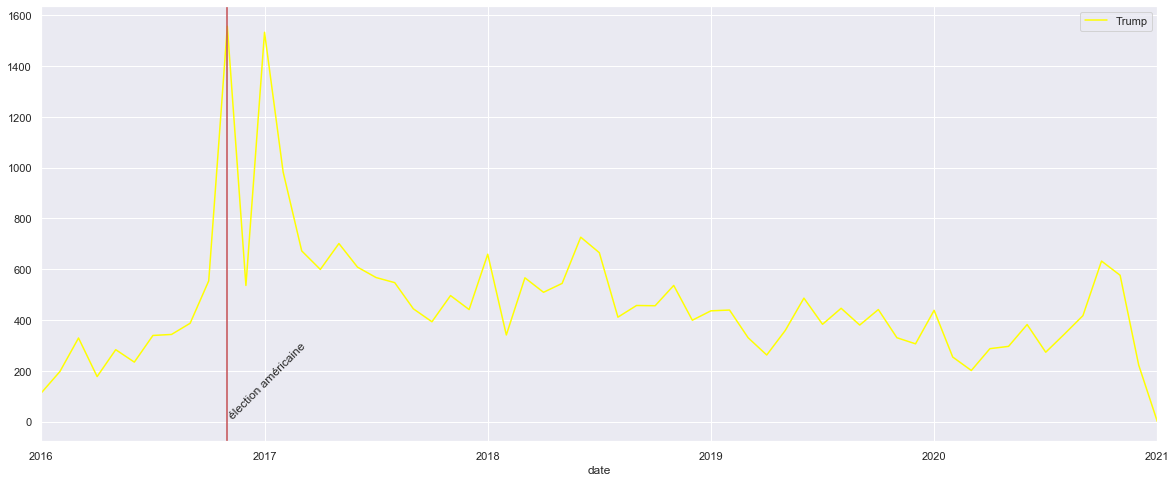

In [16]:
affiche_occ_list([['Trump']], freq = '1M',first=True,année='2016',lv=['2016-11'],lab='élection américaine')

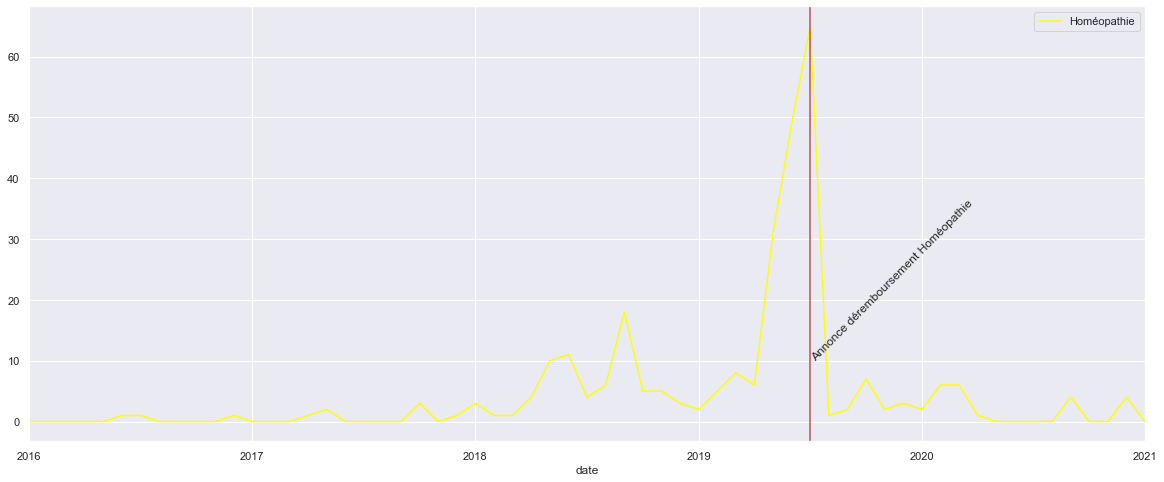

In [17]:
affiche_occ_list([['Homéopathie']], freq = '1M',first=True,année='2016',lv=['2019-07'],lab='Annonce déremboursement Homéopathie')

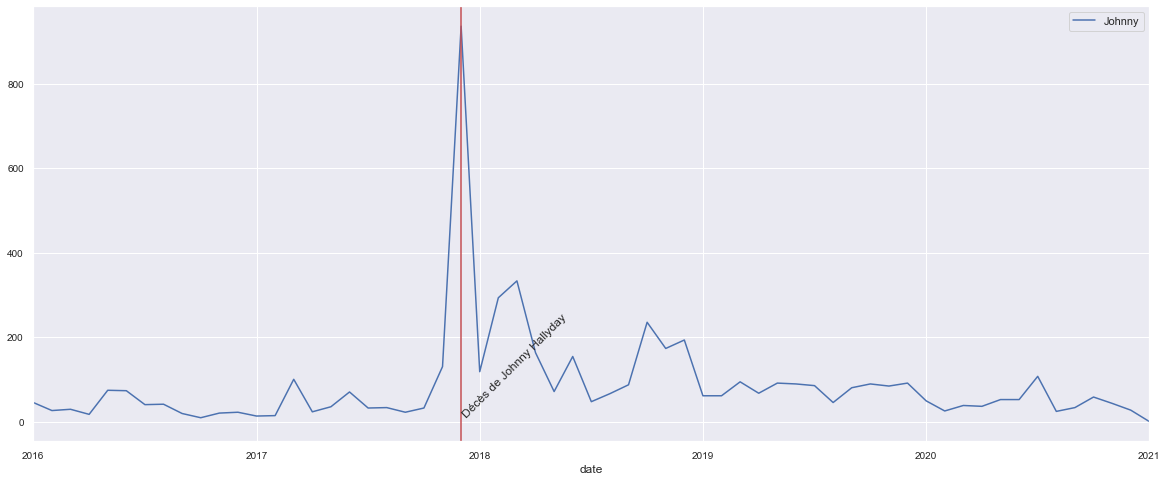

In [72]:
affiche_occ_list([['Johnny']], freq = '1M',first=True,année='2016',lv=['2017-12'],lab='Décès de Johnny Hallyday')

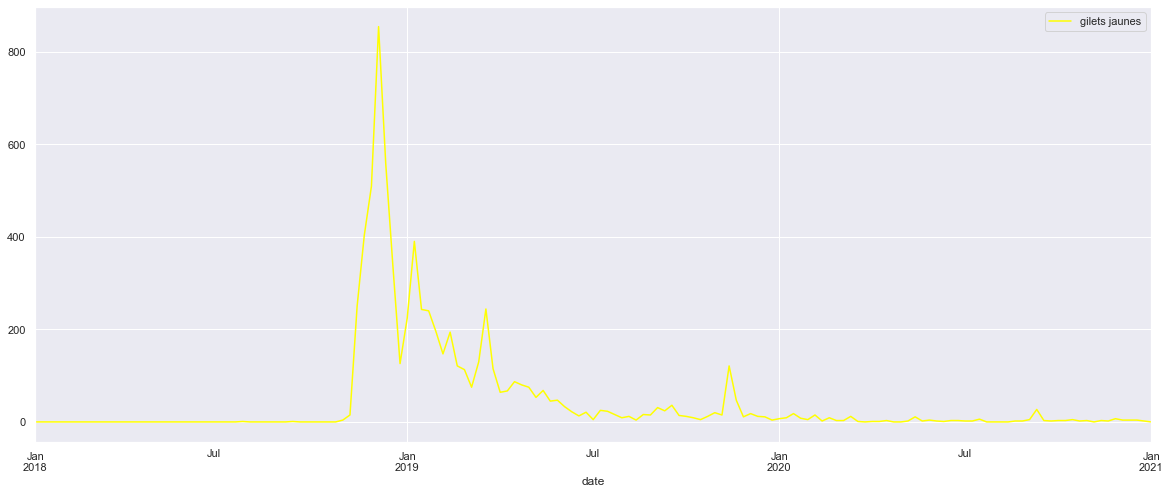

In [19]:
affiche_occ_list([['gilets jaunes','gilet jaune']], freq = '1W',first=True,année='2018')

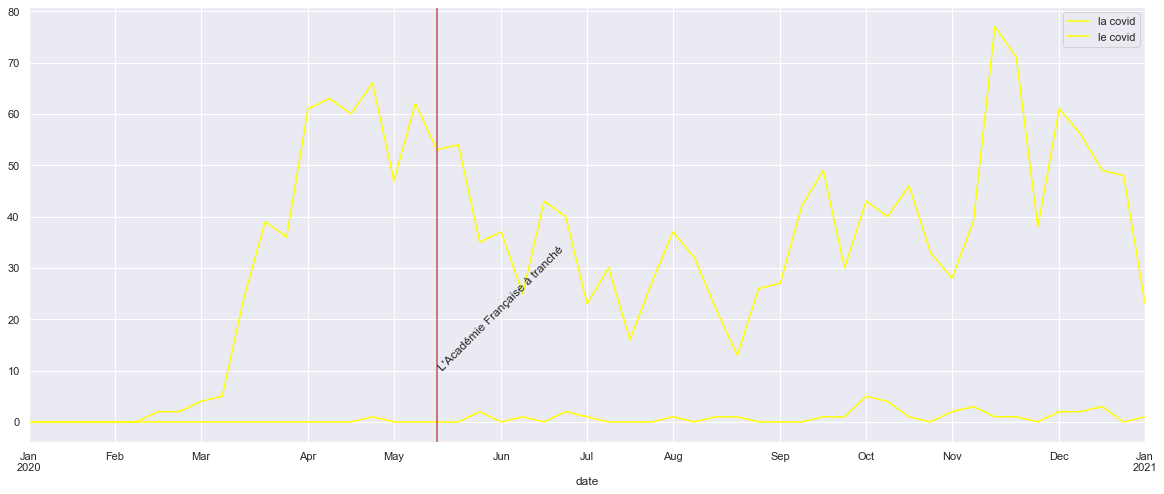

In [20]:
affiche_occ_list([['la covid'],['le covid']], freq = '1W',first=True,année='2020',lv=['2020-05-12'],lab="L'Académie Française à tranché")

In [21]:
#stat
df_total.nom_journal.value_counts()

figaro            410379
lePoint           330613
le_monde          218153
liberation        147593
closer             69067
public             66327
science_avenir     48141
nordpresse          6786
charlie_hebdo       5095
gorafi              3233
Name: nom_journal, dtype: int64

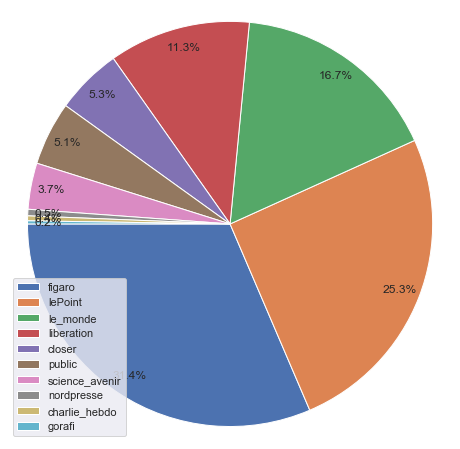

In [22]:
labels = df_total.nom_journal.value_counts().index
sizes = df_total.nom_journal.value_counts()

fig1, ax1 = plt.subplots(1,1,figsize=(8,8))
ax1.pie(sizes, autopct='%1.1f%%',
        shadow=False, startangle=180, pctdistance = 0.9)
ax1.axis('equal')
plt.legend(labels)
plt.show()

In [23]:
#taille mot / titre moyen par journal
l_j = []
l_nbmm = []
l_tmm = []
#pour viz dans le temps
l_len = []
l_nbm = []
for noms in df_total['nom_journal'].unique():
    taille = 0
    nb_mot = 0
    for titre in df_total[df_total['nom_journal'] == str(noms)]['titre']:
        taille+= len(str(titre).strip())
        nb_mot+= len(str(titre).split())
        #pour viz time series
        l_len.append(len(str(titre).strip()))
        l_nbm.append(len(str(titre).split()))           
    #m = taille/nb_mot
    tmt = taille/len(df_total[df_total['nom_journal'] == str(noms)])
    nbmm = nb_mot/len(df_total[df_total['nom_journal'] == str(noms)]['titre'])
    tmm = tmt/nbmm
    l_j.append(noms)
    l_nbmm.append(nbmm)
    l_tmm.append(tmm)
    print(noms,":" ,"\n", "taille moy titre nb car:",tmt,"\n","nb mots moy:", nbmm,'\n','taillle moyen du mot:',tmm,'\n')

charlie_hebdo : 
 taille moy titre nb car: 38.06005888125613 
 nb mots moy: 6.520706575073602 
 taillle moyen du mot: 5.836799807362369 

closer : 
 taille moy titre nb car: 79.15922220452605 
 nb mots moy: 13.522130684697467 
 taillle moyen du mot: 5.854049487490003 

figaro : 
 taille moy titre nb car: 60.08069370021371 
 nb mots moy: 9.619878210142332 
 taillle moyen du mot: 6.245473423652084 

gorafi : 
 taille moy titre nb car: 78.12898236931642 
 nb mots moy: 13.41014537581194 
 taillle moyen du mot: 5.82611002191212 

lePoint : 
 taille moy titre nb car: 62.36023084391721 
 nb mots moy: 10.176009412818008 
 taillle moyen du mot: 6.128161670661034 

le_monde : 
 taille moy titre nb car: 67.48980302814996 
 nb mots moy: 11.403826672106273 
 taillle moyen du mot: 5.918171590000559 

liberation : 
 taille moy titre nb car: 53.83424688162718 
 nb mots moy: 8.87680310041804 
 taillle moyen du mot: 6.064598512846582 

nordpresse : 
 taille moy titre nb car: 74.37150014736221 
 nb mots 

In [24]:
l_nbm[:10]

[11, 3, 4, 15, 9, 12, 9, 9, 6, 6]

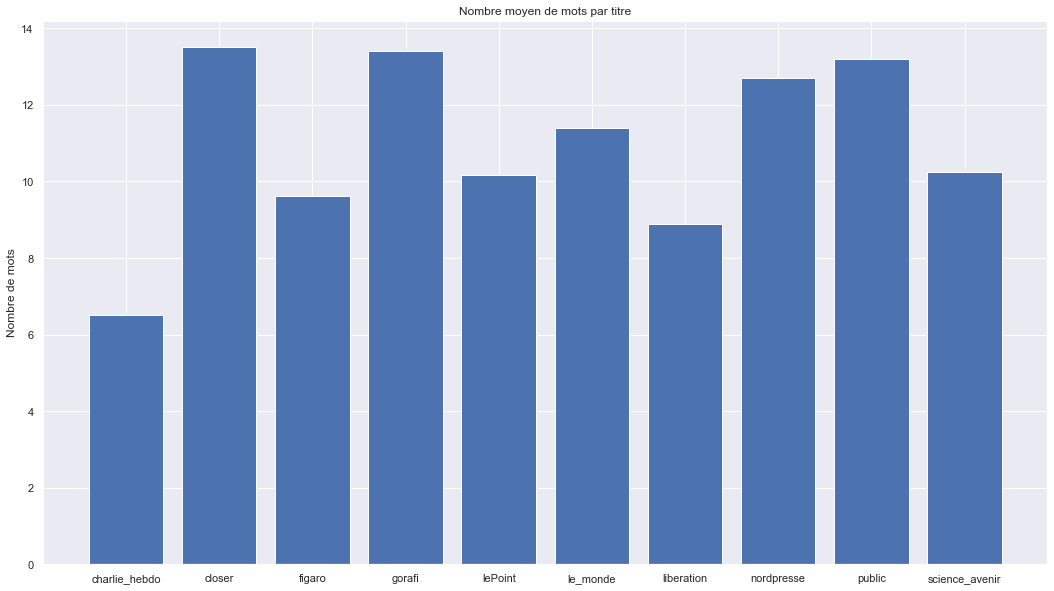

In [25]:
fig, ax1 = plt.subplots(1,1,figsize=(18,10))

ax1.bar(df_total['nom_journal'].unique(),
        l_nbmm)
ax1.set_ylabel("Nombre de mots")
ax1.set_title("Nombre moyen de mots par titre")
plt.show()

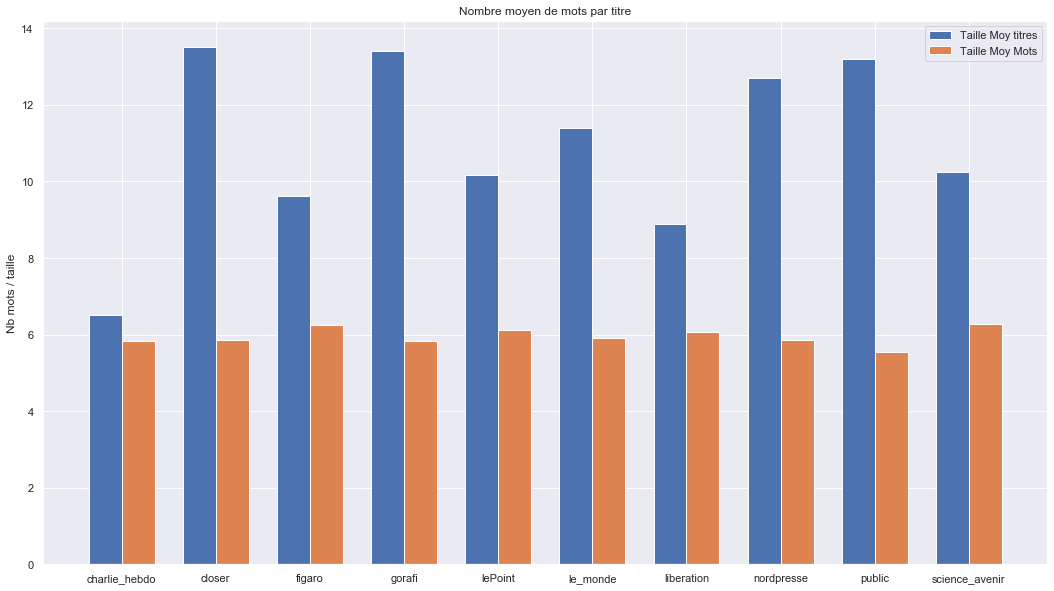

In [26]:
labels=df_total['nom_journal'].unique()


x = np.arange(len(labels))  # the label locations
width = 0.35

fig, ax = plt.subplots(1,1,figsize=(18,10))
rects1 = ax.bar(x - width/2, l_nbmm, width, label='Taille Moy titres')
rects2 = ax.bar(x + width/2, l_tmm, width, label='Taille Moy Mots')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nb mots / taille')
ax.set_title('Nombre moyen de mots par titre')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

In [27]:
dft = df_total.copy()
dft['tailletitre']=l_len
dft['nbm']=l_nbm

In [28]:
liste_csv[0][:-4]

'charlie_hebdo'

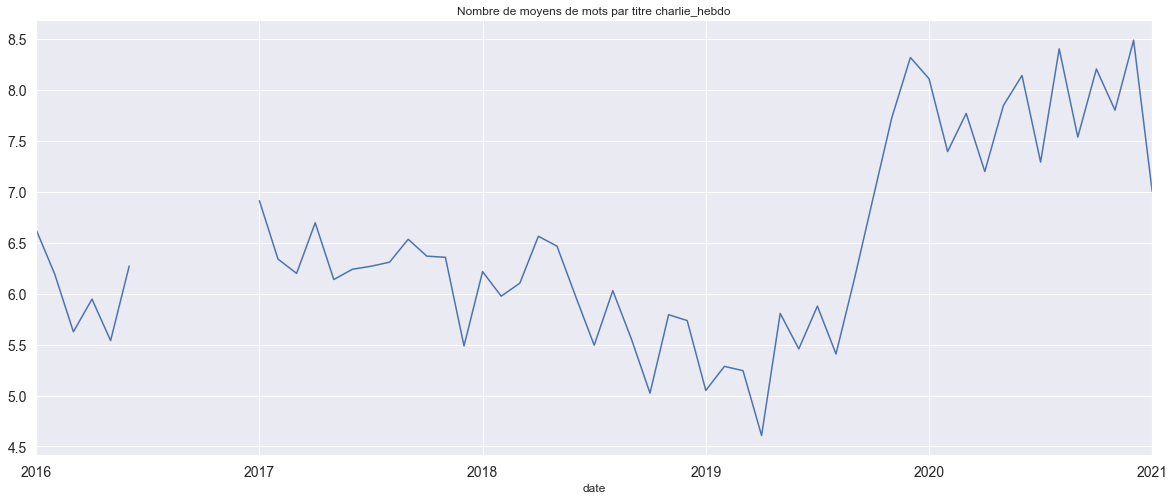

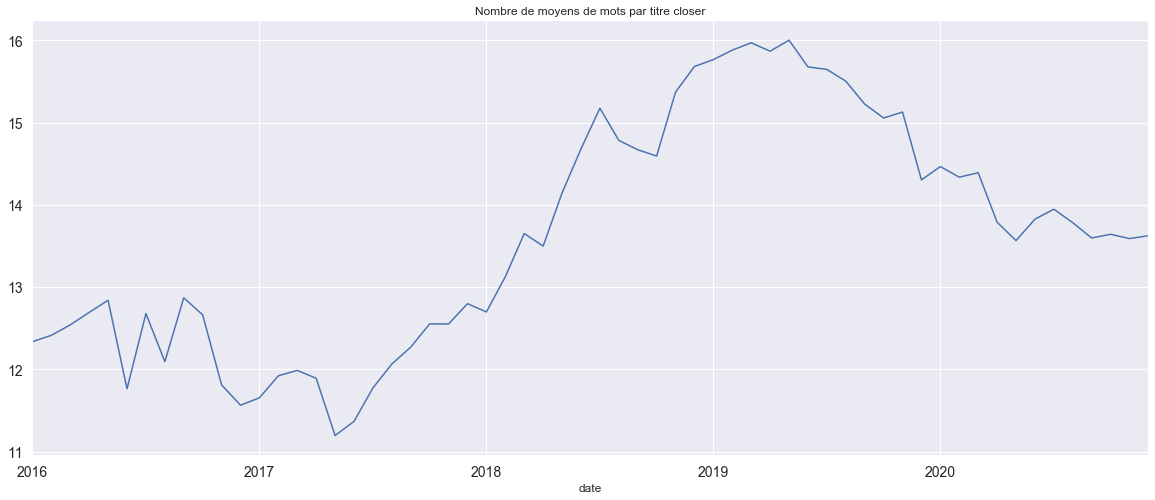

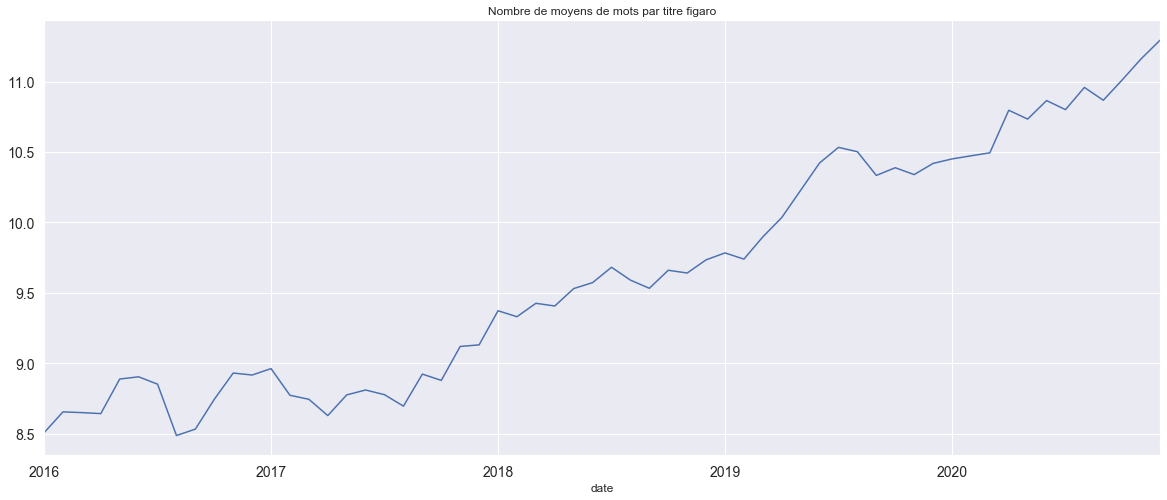

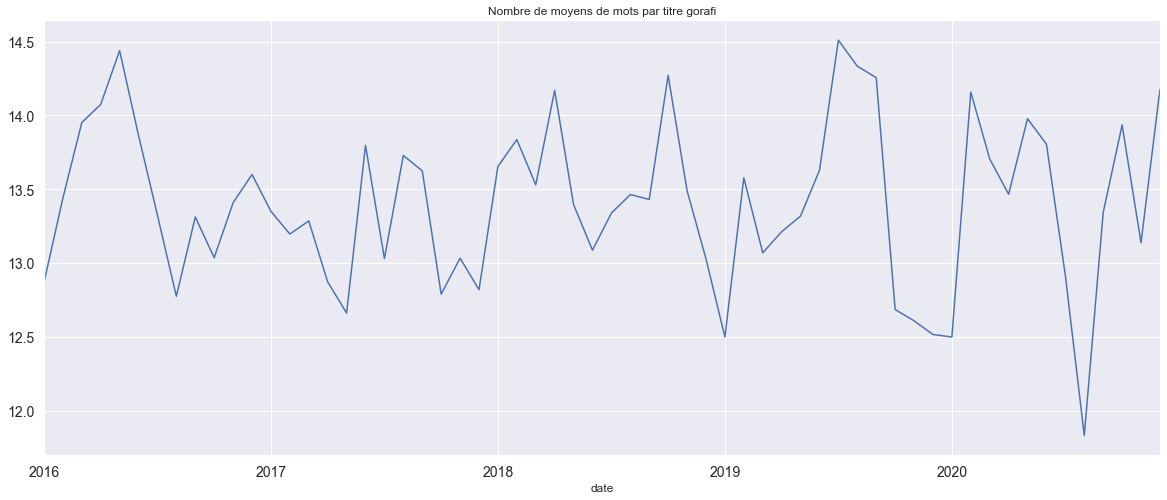

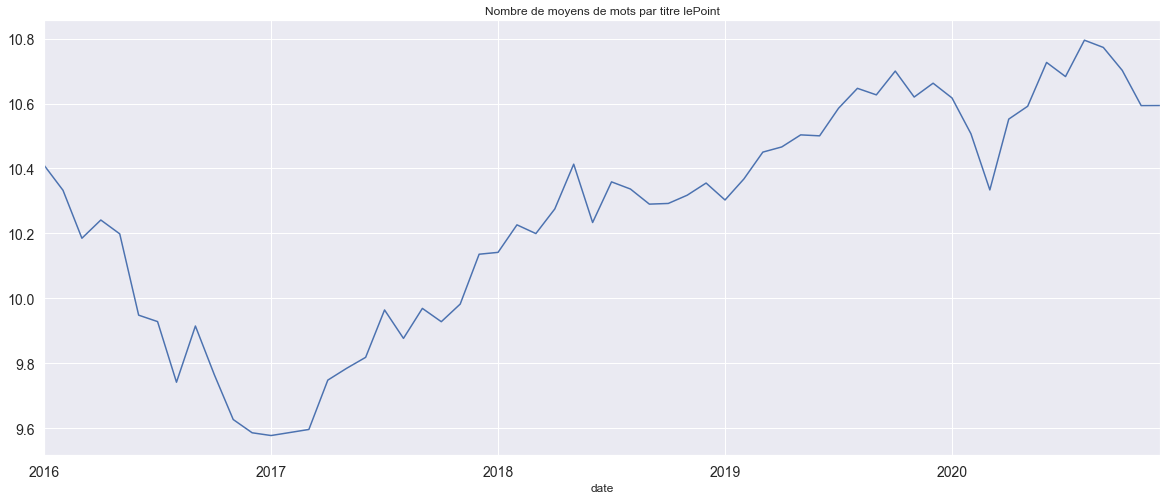

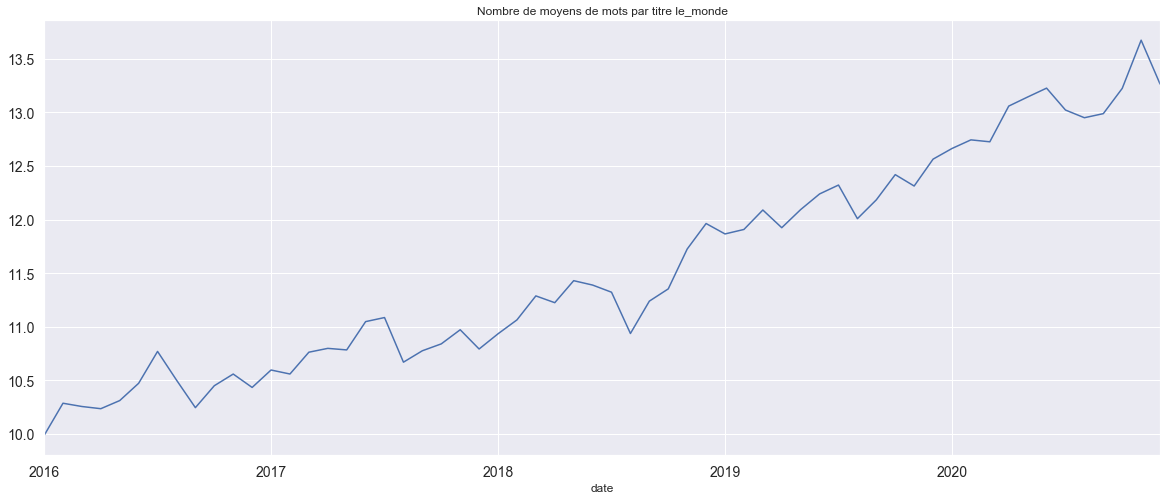

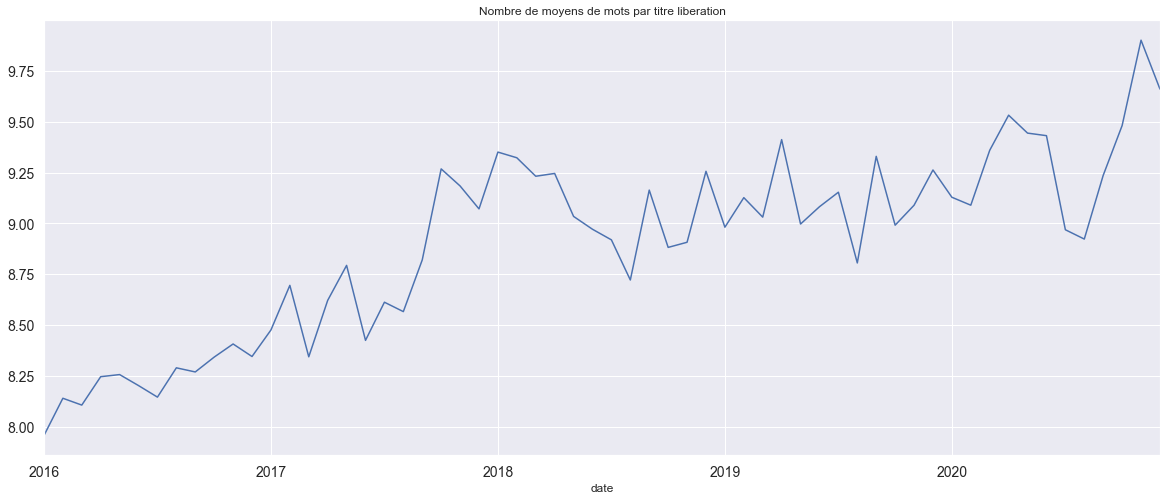

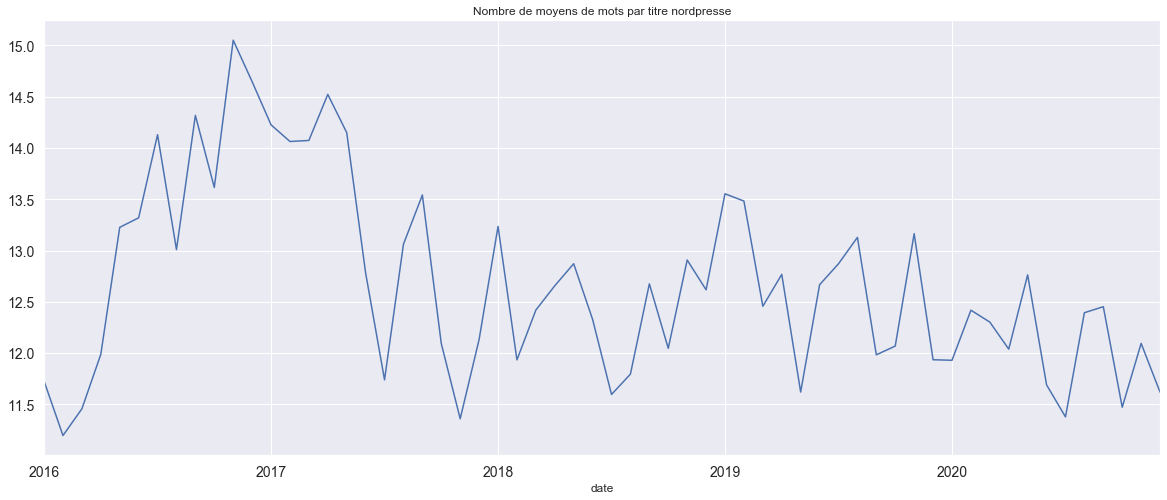

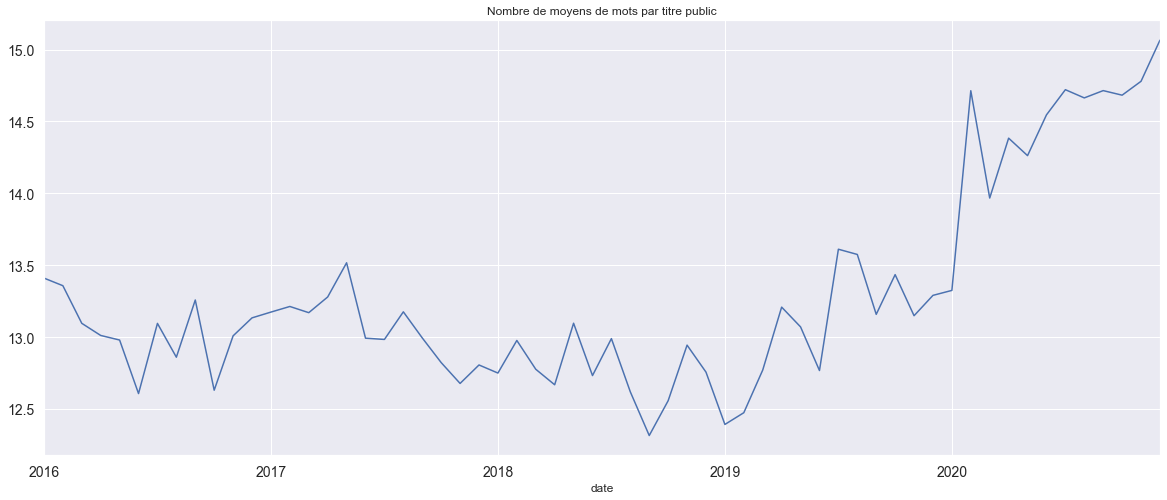

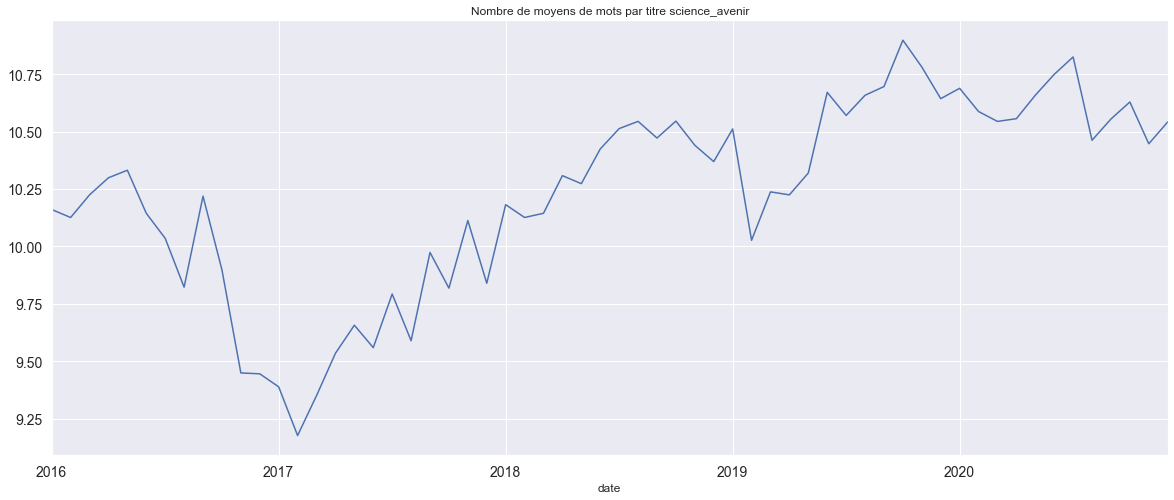

In [71]:
#l_len 
#l_nbm 


for j in liste_csv:
    nj = j[:-4] #enlève .csv
    dd = dft[(dft['date']> pd.to_datetime('2016', format='%Y')) & (dft['nom_journal']==nj)].copy()
    GB = (dd.groupby( pd.Grouper(key='date', freq='1M')).mean()['nbm'])
    GB.plot(figsize=(20,8))
    plt.title('Nombre de moyens de mots par titre '+nj)
    plt.show()

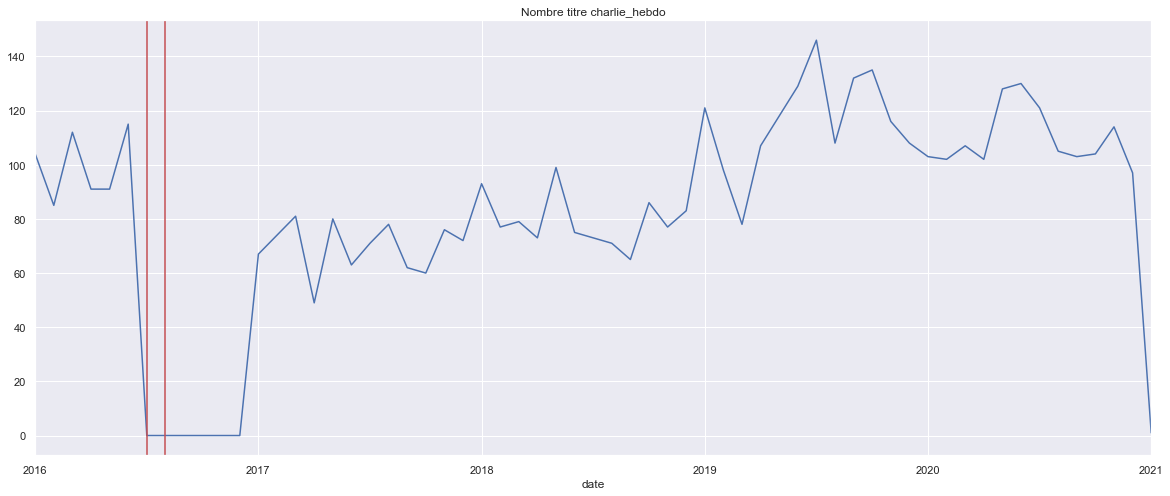

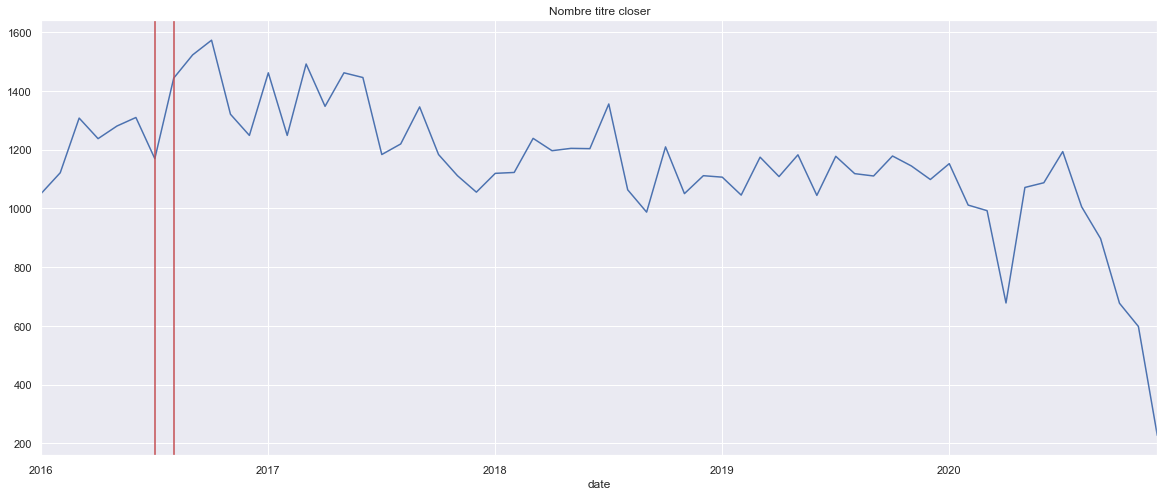

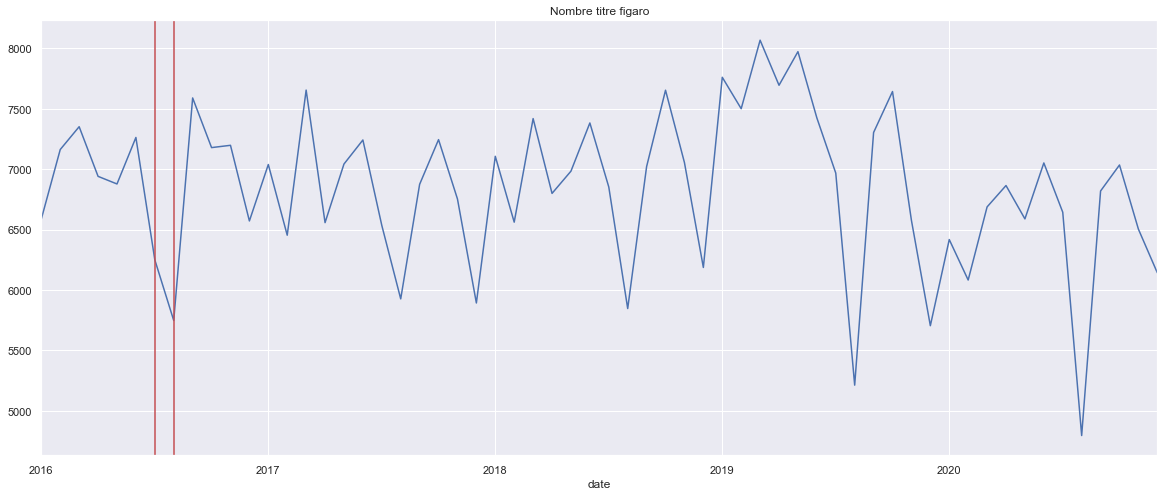

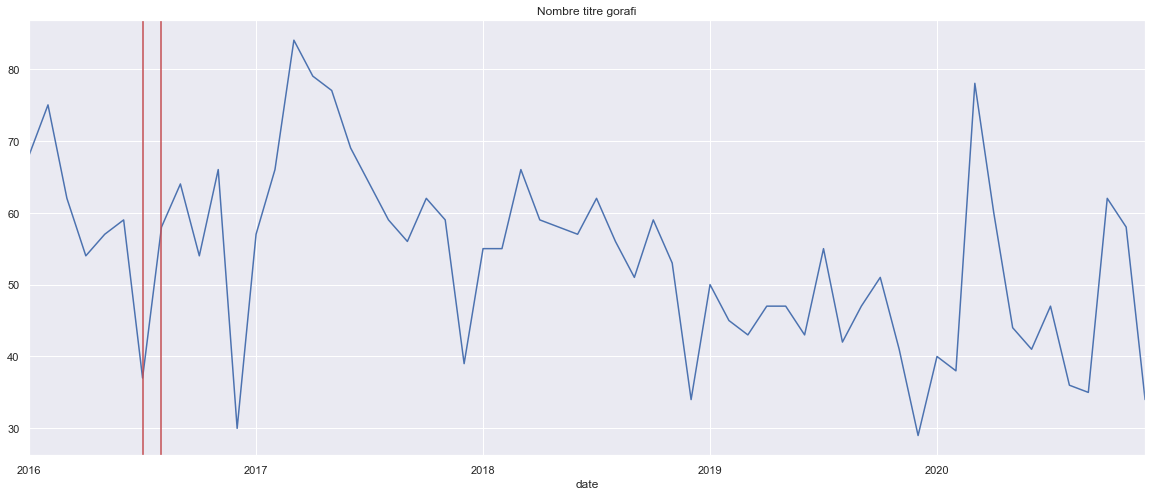

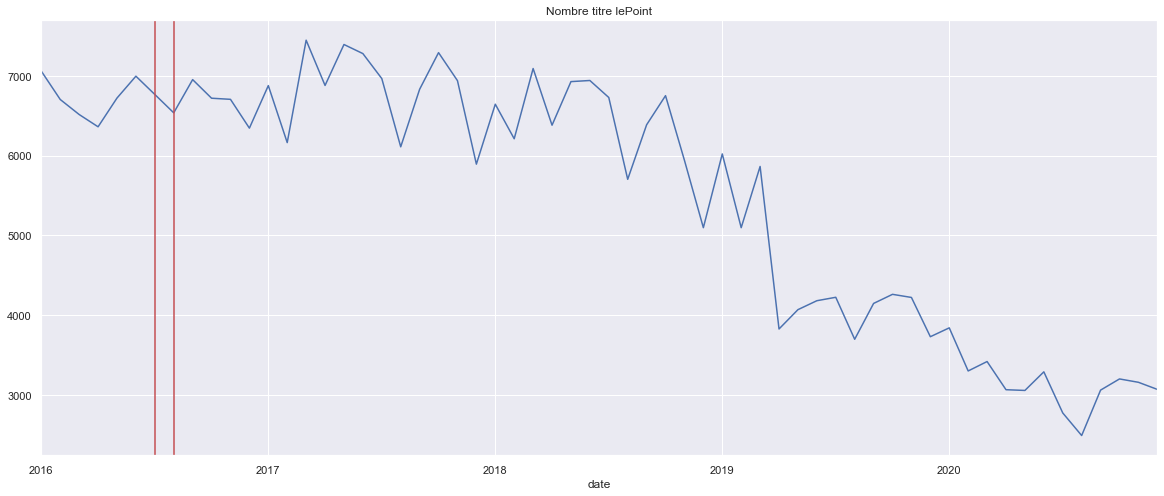

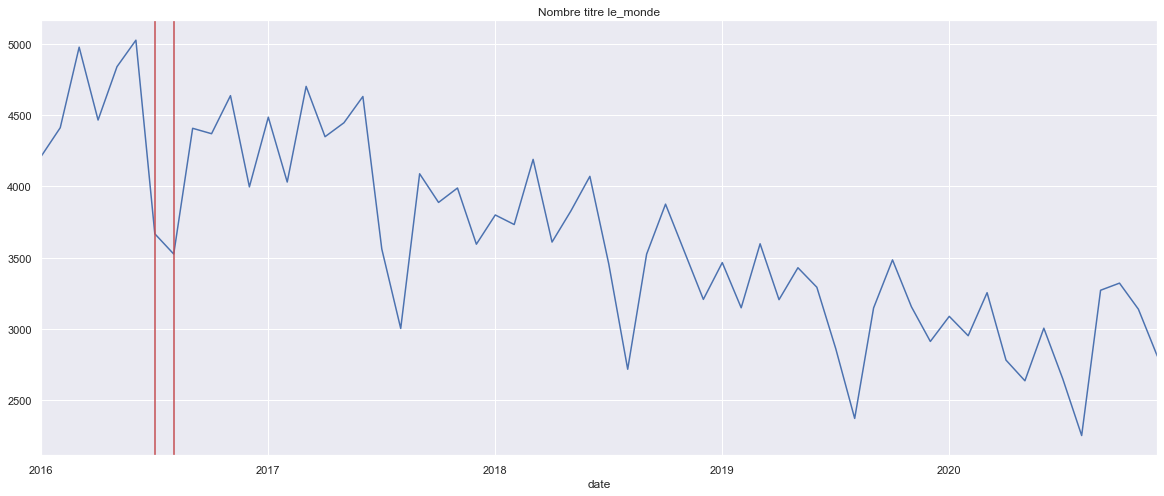

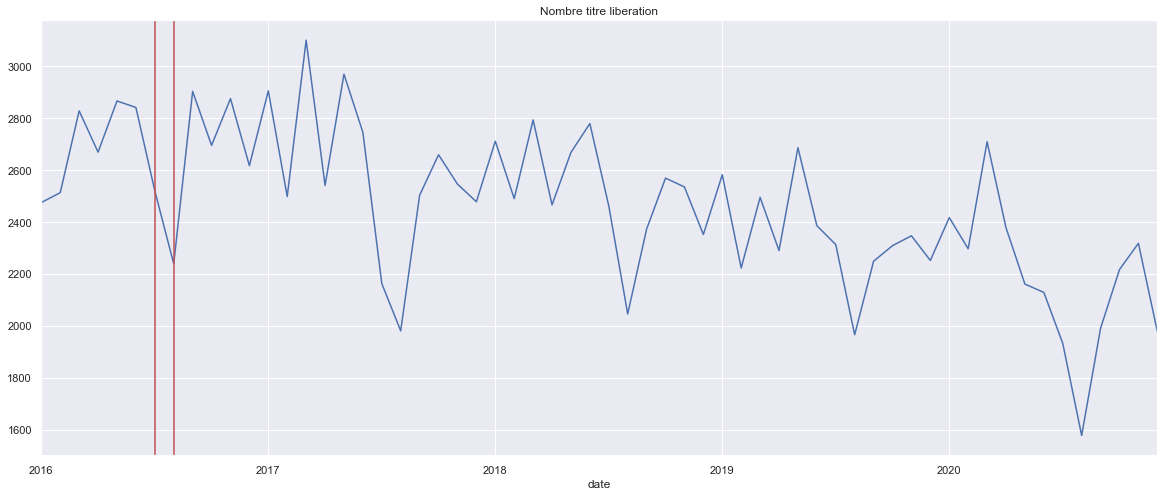

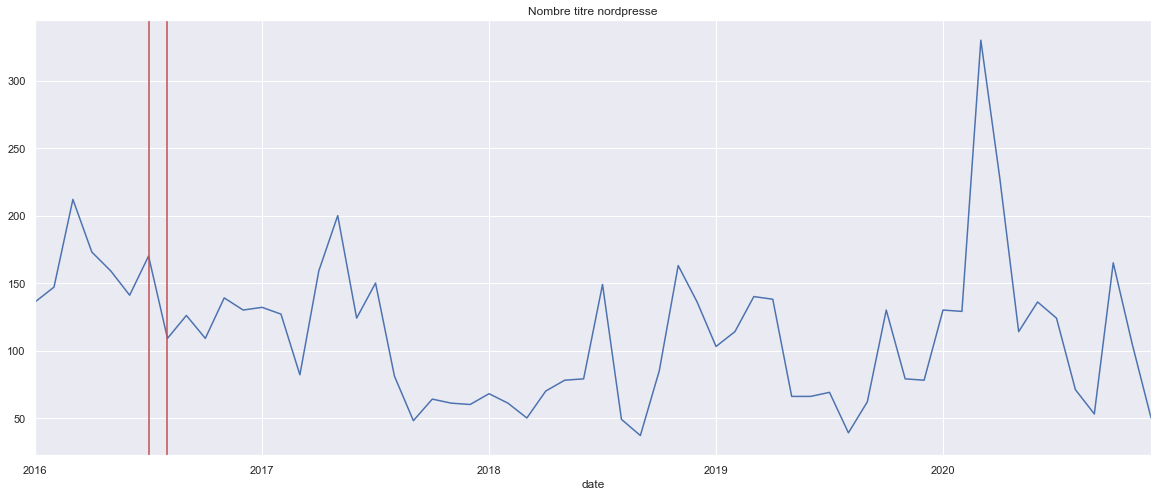

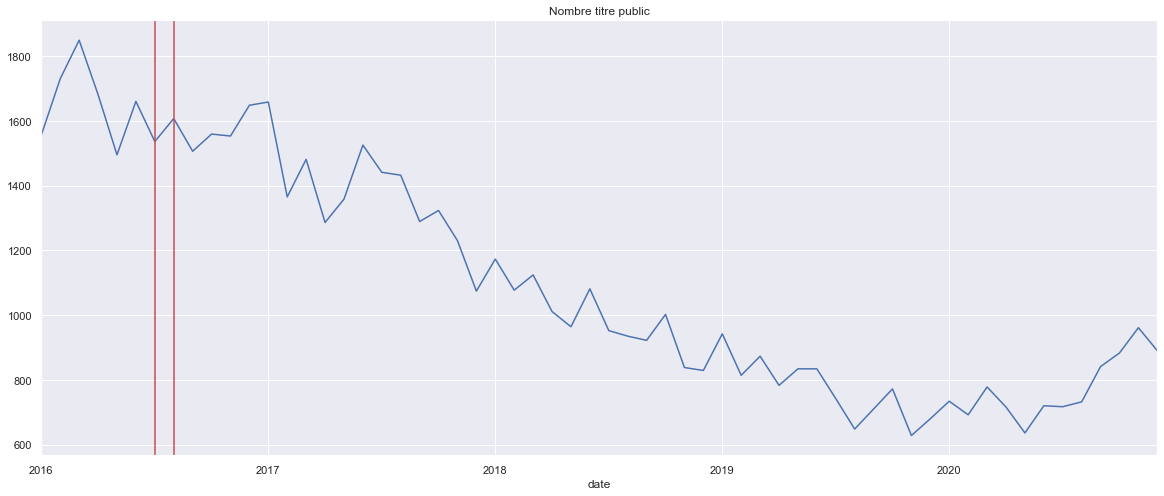

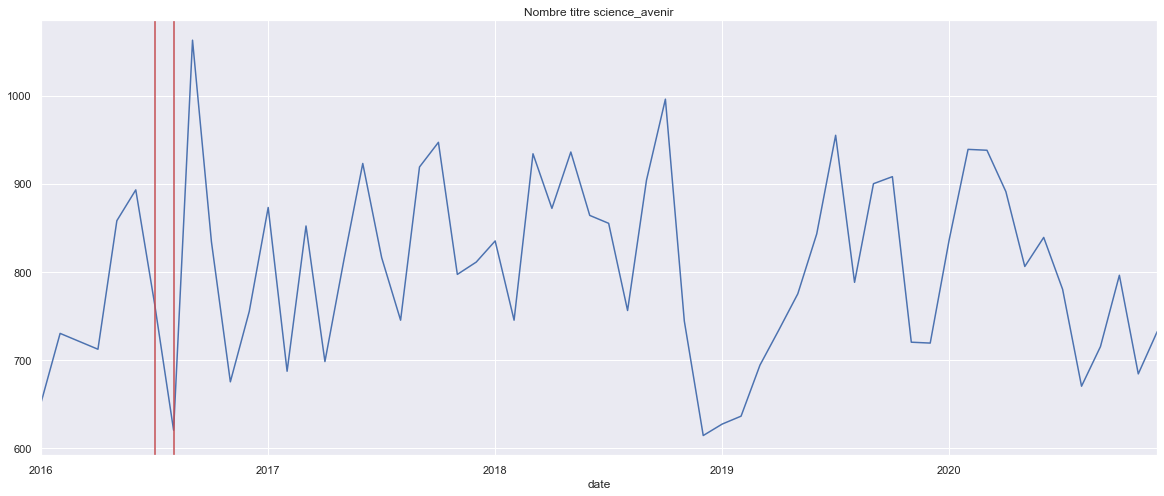

In [30]:
for j in liste_csv:
    nj = j[:-4] #enlève .csv
    dd = dft[(dft['date']> pd.to_datetime('2016', format='%Y')) & (dft['nom_journal']==nj)].copy()
    GB = (dd.groupby( pd.Grouper(key='date', freq='1M')).count()['titre'])
    GB.plot(figsize=(20,8))
    plt.title('Nombre titre '+nj)
    plt.axvline(pd.Timestamp('2016-08'),color='r')
    plt.axvline(pd.Timestamp('2016-07'),color='r')
    plt.show()

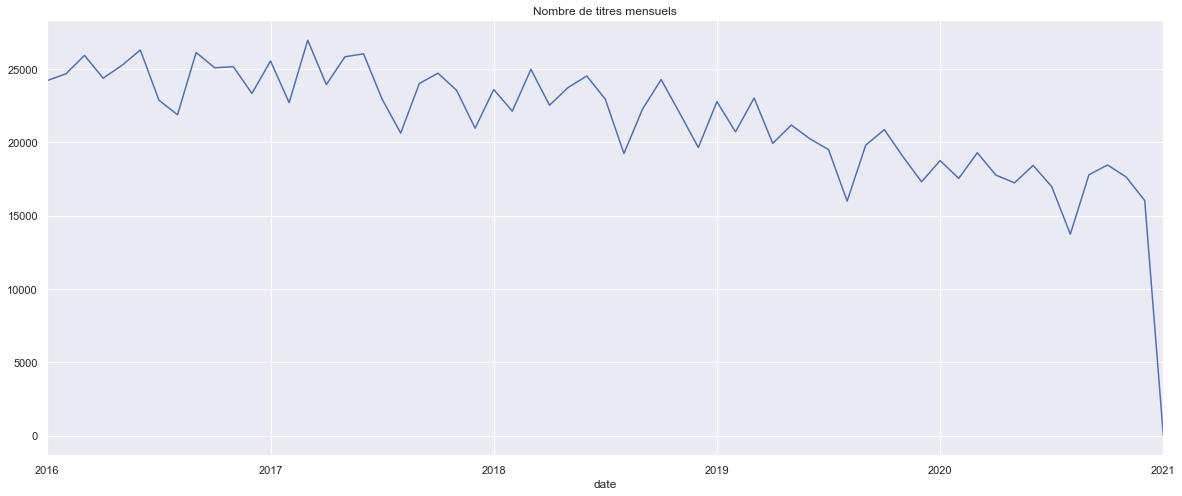

In [31]:
#nb titre par mois
GB = (df_total.groupby( pd.Grouper(key='date', freq='1M')).count()['titre'])
GB.plot(figsize=(20,8))
plt.title('Nombre de titres mensuels')
plt.show()

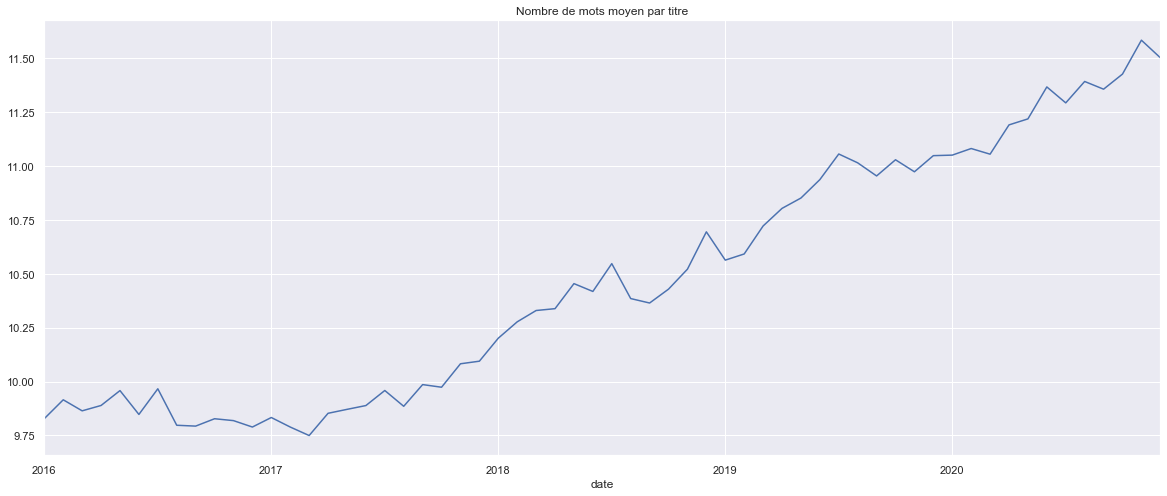

In [32]:
#nb mots part titre par moisen f° temps
dd = dft[(dft['date']> pd.to_datetime('2016', format='%Y'))&(dft['date']< pd.to_datetime('2021', format='%Y'))]
GB = (dd.groupby( pd.Grouper(key='date', freq='1M')).mean()['nbm'])
GB.plot(figsize=(20,8))
plt.title('Nombre de mots moyen par titre')
plt.show()